In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


## Base de datos vehiculos eléctricos e hibrídos ICAEN

In [3]:
ve=pd.read_csv(r"C:\DataScience\trabajo final\MatriculaCatalunya.csv")

C:\Users\verom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,11,12,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
ve

,Provincia,Comarca,CPostal,Municipi,Codi IDESCAT,Tipus Vehicle,Marca,Model,Tecnologia,Client,Tipus alta,Mes,Any,Descripció,Uts
0,Barcelona,ALT PENEDES,ND,Sant Sadurní d'Anoia,82401,01-Aut.Turisme,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1
1,Barcelona,ALT PENEDES,ND,Sant Sadurní d'Anoia,82401,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,2
2,Barcelona,ALT PENEDES,ND,Subirats,82732,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1
3,Barcelona,ALT PENEDES,ND,Gelida,80919,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1
4,Barcelona,ALT PENEDES,ND,"Granada, La",80945,01-Aut.Turisme,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98920,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Skoda,Enyaq,Elèctric,Empresa,Nou,9,2022,Turisme,1
98921,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Toyota,C-HR,Gasolina/Elèctric,Empresa,Nou,7,2022,Turisme,2
98922,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Toyota,RAV 4,Gasolina/Elèctric,Empresa,Nou,5,2022,Turisme,1
98923,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Toyota,RAV 4,Gasolina/Elèctric,Empresa,Nou,7,2022,Turisme,1


#ve.groupby(["Comarca"])["Client"].count()

### Creación de la fecha a la que corresponden los datos 

In [6]:
ve["Any"]= ve["Any"].apply(lambda x: str(x))

In [7]:
ve=ve.drop(ve[ve["Any"]=="Any"].index)

In [8]:
ve["date"]=pd.to_datetime ({"year":ve["Any"], "month":ve["Mes"], "day":1})

In [9]:
ve

,Provincia,Comarca,CPostal,Municipi,Codi IDESCAT,Tipus Vehicle,Marca,Model,Tecnologia,Client,Tipus alta,Mes,Any,Descripció,Uts,date
0,Barcelona,ALT PENEDES,ND,Sant Sadurní d'Anoia,82401,01-Aut.Turisme,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01
1,Barcelona,ALT PENEDES,ND,Sant Sadurní d'Anoia,82401,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,2,2017-01-01
2,Barcelona,ALT PENEDES,ND,Subirats,82732,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01
3,Barcelona,ALT PENEDES,ND,Gelida,80919,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01
4,Barcelona,ALT PENEDES,ND,"Granada, La",80945,01-Aut.Turisme,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98920,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Skoda,Enyaq,Elèctric,Empresa,Nou,9,2022,Turisme,1,2022-09-01
98921,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Toyota,C-HR,Gasolina/Elèctric,Empresa,Nou,7,2022,Turisme,2,2022-07-01
98922,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Toyota,RAV 4,Gasolina/Elèctric,Empresa,Nou,5,2022,Turisme,1,2022-05-01
98923,Barcelona,ALT PENEDES,08794,"Cabanyes, les",080272,02-Tot Terreny,Toyota,RAV 4,Gasolina/Elèctric,Empresa,Nou,7,2022,Turisme,1,2022-07-01


## Incorporación del codigo de la comarca 

In [10]:
cod=pd.read_csv(r"C:\DataScience\trabajo final\cod_comarca.csv", sep=";")

In [12]:
vecod=pd.merge(ve,cod)

In [13]:
vecod

,Provincia,Comarca,CPostal,Municipi,Codi IDESCAT,Tipus Vehicle,Marca,Model,Tecnologia,Client,Tipus alta,Mes,Any,Descripció,Uts,date,cod_comarca
0,Barcelona,ALT PENEDES,ND,Sant Sadurní d'Anoia,82401,01-Aut.Turisme,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01,3
1,Barcelona,ALT PENEDES,ND,Sant Sadurní d'Anoia,82401,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,2,2017-01-01,3
2,Barcelona,ALT PENEDES,ND,Subirats,82732,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01,3
3,Barcelona,ALT PENEDES,ND,Gelida,80919,02-Tot Terreny,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01,3
4,Barcelona,ALT PENEDES,ND,"Granada, La",80945,01-Aut.Turisme,ND,ND,Gasolina/Elèctric,ND,ND,1,2017,Turisme,1,2017-01-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98919,LLeida,SEGRIÀÀ,25199,Lleida,251207,02-Tot Terreny,Lexus,UX,Gasolina/Elèctric,Particular,Nou,11,2021,Turisme,1,2021-11-01,33
98920,LLeida,SEGRIÀÀ,25660,Alcoletge,250122,02-Tot Terreny,Kia,Niro,Elèctric,Particular,Nou,11,2021,Turisme,1,2021-11-01,33
98921,LLeida,SEGRIÀÀ,25660,Alcoletge,250122,02-Tot Terreny,Kia,Niro,Gasolina/Elèctric,Particular,Nou,11,2021,Turisme,1,2021-11-01,33
98922,LLeida,SEGRIÀÀ,25660,Alcoletge,250122,02-Tot Terreny,BMW,X3,Diesel Mild Hybrid,Particular,Nou,11,2021,Tot terreny,1,2021-11-01,33


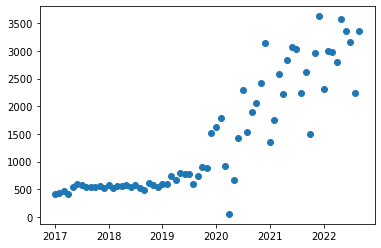

In [14]:
plt.plot_date(ve["date"].value_counts().index, ve["date"].value_counts())
plt.show()

## Base de datos matriculaciones mensuales por codigo de comarca 

In [15]:
t=vecod.pivot_table( index="date", columns= "cod_comarca",values=["Uts"], aggfunc= "count")

In [17]:
t.columns=t.columns.droplevel()

In [18]:
t

cod_comarca,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,4.0,14.0,7.0,1.0,NaN,8.0,32.0,6.0,3.0,6.0,...,1.0,13.0,12.0,NaN,23.0,2.0,1.0,1.0,44.0,35.0
2017-02-01,8.0,18.0,6.0,NaN,NaN,9.0,34.0,13.0,6.0,13.0,...,3.0,9.0,13.0,1.0,17.0,1.0,NaN,1.0,57.0,24.0
2017-03-01,7.0,14.0,12.0,NaN,NaN,5.0,37.0,12.0,4.0,13.0,...,NaN,14.0,17.0,2.0,18.0,1.0,2.0,NaN,56.0,38.0
2017-04-01,2.0,13.0,8.0,NaN,NaN,3.0,37.0,19.0,5.0,10.0,...,2.0,11.0,11.0,NaN,15.0,1.0,1.0,NaN,52.0,41.0
2017-05-01,4.0,16.0,17.0,NaN,1.0,6.0,48.0,21.0,5.0,13.0,...,1.0,10.0,17.0,NaN,23.0,NaN,1.0,1.0,57.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,18.0,84.0,71.0,11.0,NaN,60.0,169.0,76.0,43.0,71.0,...,5.0,135.0,70.0,4.0,148.0,6.0,14.0,4.0,447.0,216.0
2022-06-01,26.0,66.0,63.0,7.0,1.0,47.0,184.0,91.0,42.0,66.0,...,7.0,118.0,68.0,4.0,152.0,3.0,9.0,1.0,447.0,219.0
2022-07-01,20.0,87.0,63.0,4.0,1.0,54.0,161.0,87.0,29.0,71.0,...,4.0,100.0,64.0,3.0,110.0,4.0,12.0,3.0,382.0,195.0


In [19]:
index=pd.date_range(start="2017", periods=69, freq="M")
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
      

In [20]:
t.index=index


In [21]:
t

cod_comarca,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
2017-01-31,4.0,14.0,7.0,1.0,NaN,8.0,32.0,6.0,3.0,6.0,...,1.0,13.0,12.0,NaN,23.0,2.0,1.0,1.0,44.0,35.0
2017-02-28,8.0,18.0,6.0,NaN,NaN,9.0,34.0,13.0,6.0,13.0,...,3.0,9.0,13.0,1.0,17.0,1.0,NaN,1.0,57.0,24.0
2017-03-31,7.0,14.0,12.0,NaN,NaN,5.0,37.0,12.0,4.0,13.0,...,NaN,14.0,17.0,2.0,18.0,1.0,2.0,NaN,56.0,38.0
2017-04-30,2.0,13.0,8.0,NaN,NaN,3.0,37.0,19.0,5.0,10.0,...,2.0,11.0,11.0,NaN,15.0,1.0,1.0,NaN,52.0,41.0
2017-05-31,4.0,16.0,17.0,NaN,1.0,6.0,48.0,21.0,5.0,13.0,...,1.0,10.0,17.0,NaN,23.0,NaN,1.0,1.0,57.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,18.0,84.0,71.0,11.0,NaN,60.0,169.0,76.0,43.0,71.0,...,5.0,135.0,70.0,4.0,148.0,6.0,14.0,4.0,447.0,216.0
2022-06-30,26.0,66.0,63.0,7.0,1.0,47.0,184.0,91.0,42.0,66.0,...,7.0,118.0,68.0,4.0,152.0,3.0,9.0,1.0,447.0,219.0
2022-07-31,20.0,87.0,63.0,4.0,1.0,54.0,161.0,87.0,29.0,71.0,...,4.0,100.0,64.0,3.0,110.0,4.0,12.0,3.0,382.0,195.0
2022-08-31,18.0,66.0,32.0,2.0,1.0,32.0,84.0,63.0,25.0,49.0,...,2.0,70.0,64.0,4.0,87.0,3.0,5.0,1.0,319.0,142.0


In [23]:
comarcas=cod["Comarca"].iloc[0:15]

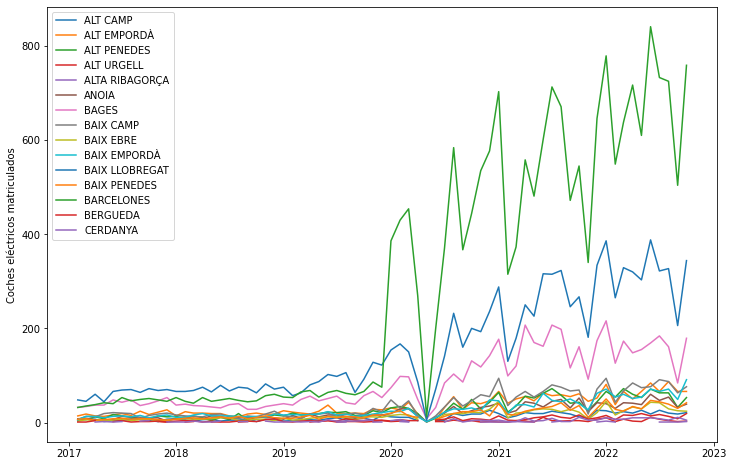

In [24]:
plt.figure(figsize = (12,8))
plt.plot(t.iloc[:, 0:15], label=comarcas)
plt.ylabel('Coches eléctricos matriculados')

plt.legend()
plt.show()

## Base de datos matriculaciones mensuales por codigo de comarca 2

In [25]:
t2=vecod.pivot_table( index="cod_comarca", columns= "date",values=["Uts"], aggfunc= "count")

In [26]:
t2.columns=t2.columns.droplevel()

In [27]:
t2= t2.fillna(0)

In [28]:
t2

date,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2021-12-01,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01
cod_comarca,,,,,,,,,,,,,,,,,,,,,
1,4.0,8.0,7.0,2.0,4.0,4.0,8.0,7.0,4.0,2.0,...,25.0,20.0,23.0,20.0,26.0,18.0,26.0,20.0,18.0,21.0
2,14.0,18.0,14.0,13.0,16.0,19.0,15.0,24.0,17.0,22.0,...,81.0,38.0,66.0,50.0,66.0,84.0,66.0,87.0,66.0,66.0
3,7.0,6.0,12.0,8.0,17.0,14.0,11.0,8.0,7.0,14.0,...,66.0,54.0,72.0,60.0,53.0,71.0,63.0,63.0,32.0,53.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,10.0,2.0,7.0,3.0,2.0,11.0,7.0,4.0,2.0,3.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
6,8.0,9.0,5.0,3.0,6.0,13.0,12.0,11.0,10.0,10.0,...,40.0,30.0,42.0,41.0,38.0,60.0,47.0,54.0,32.0,39.0
7,32.0,34.0,37.0,37.0,48.0,43.0,48.0,36.0,40.0,46.0,...,216.0,126.0,173.0,148.0,155.0,169.0,184.0,161.0,84.0,179.0
8,6.0,13.0,12.0,19.0,21.0,20.0,19.0,9.0,15.0,18.0,...,94.0,43.0,67.0,84.0,74.0,76.0,91.0,87.0,63.0,76.0
9,3.0,6.0,4.0,5.0,5.0,7.0,4.0,6.0,7.0,3.0,...,45.0,16.0,25.0,33.0,29.0,43.0,42.0,29.0,25.0,24.0


### transformacion a numpy para su analisis en TimeSerieskMeans

In [29]:
t3=t2.to_numpy()

## Identificacion # cluster

In [37]:
# imports
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from kneed import KneeLocator

In [38]:
sil_scores = []
for n in range(2, 10):
    km = TimeSeriesKMeans(n_clusters=n, metric="dtw")
    km.fit(t3)
    sil_scores.append(silhouette_score(t3, km.predict(t3), metric="dtw"))

C:\Users\verom\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 41 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\verom\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 41 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\verom\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 41 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\verom\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 41 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
C:\Users\verom\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. As

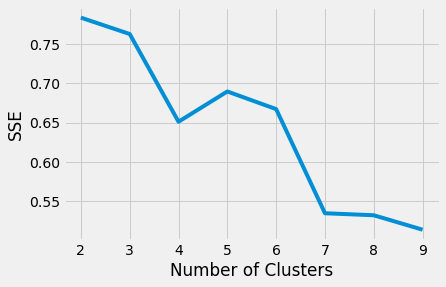

In [39]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 10), sil_scores)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [40]:
kl = KneeLocator(range(2, 10), sil_scores, curve="convex", direction="decreasing")

In [41]:
kl.elbow

4

# Cluster series temporales

In [42]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=3, metric="dtw",
                         max_iter=10, random_state=0).fit(t3)

In [43]:
 km = TimeSeriesKMeans(n_clusters=4, metric="euclidean", max_iter=5,random_state=0).fit(t3)


In [44]:
y_pred = km.fit_predict(t3)
y_pred

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 3, 2],
      dtype=int64)

In [45]:
sz=69

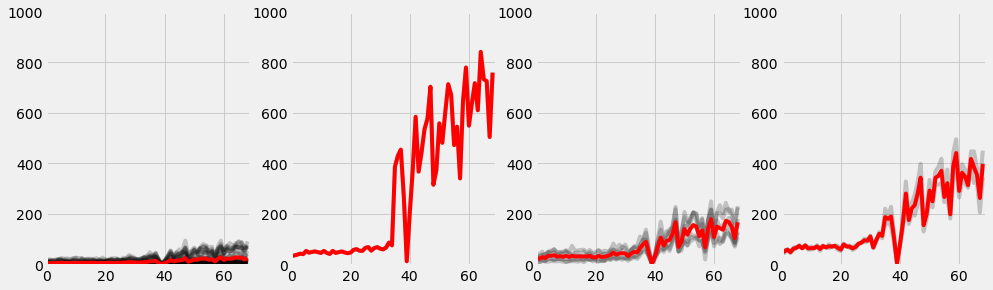

In [46]:
plt.figure(figsize=(15, 20))
for yi in range(4):
    plt.subplot(4, 4, yi + 1)
    for xx in t3[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 1000)
    #plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             #transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("")
    

In [47]:
>>> km_sdtw = TimeSeriesKMeans(n_clusters=4, metric="softdtw", max_iter=5,
...                            max_iter_barycenter=5,
...                            metric_params={"gamma": .5},
...                            random_state=0).fit(t3)

### Cambio de orden de los cluster 

In [54]:
y_pred
for index, value in enumerate(y_pred):
    if value == 1:
        y_pred[index] = 4
print(y_pred)

[0 0 0 0 0 0 2 0 0 0 3 0 4 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0
 0 0 3 2]


In [55]:
y_pred
for index, value in enumerate(y_pred):
    if value == 0:
        y_pred[index] = 1
print(y_pred)

[1 1 1 1 1 1 2 1 1 1 3 1 4 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 1 1 3 2]


### Exportación de datos para la gráfica territorial

In [56]:
t2["cluster"]=y_pred

In [57]:
t2.to_excel("clusterICAEN.xlsx")

# Datos socioeconomicos IDESCAT

In [58]:
so=pd.read_csv(r"C:\DataScience\trabajo final\idescat_info.csv", sep=";", index_col="cod_comarca",decimal=",")

In [59]:
so=so.drop([42], axis=0)
so

,comarca,RFDB (miles de euros),RFDB por habitante (miles de euros),renta 100,Población,Superficie km²,Densidad
cod_comarca,,,,,,,
1,Alt Camp,719059,16,88.4,45045,538,83.7
2,Alt Empordà,2033572,15,80.5,143762,1358,105.9
3,Alt Penedès,1835627,17,92.4,110172,593,185.9
4,Alt Urgell,293983,15,80.4,20453,1447,14.1
5,Alta Ribagorça,61648,16,88.2,3945,427,9.2
6,Anoia,1960905,16,88.2,124112,866,143.3
7,Bages,3085674,17,95.1,180962,1092,165.7
8,Baix Camp,3062021,16,86.8,195098,697,279.9
9,Baix Ebre,1121220,15,79.4,78721,1003,78.5


In [60]:
total=vecod.groupby(["cod_comarca"])["Client"].count()


In [61]:
so["cluster"]=y_pred
so["total"]=total
so.columns

Index(['comarca', 'RFDB (miles de euros)',
       'RFDB por habitante (miles de euros)', 'renta 100', 'Población',
       'Superficie km²', 'Densidad ', 'cluster', 'total'],
      dtype='object')

In [63]:
so.iloc[:, 1:15]

,RFDB (miles de euros),RFDB por habitante (miles de euros),renta 100,Población,Superficie km²,Densidad,cluster,total
cod_comarca,,,,,,,,
1,719059,16,88.4,45045,538,83.7,1,778
2,2033572,15,80.5,143762,1358,105.9,1,2380
3,1835627,17,92.4,110172,593,185.9,1,1970
4,293983,15,80.4,20453,1447,14.1,1,161
5,61648,16,88.2,3945,427,9.2,1,37
6,1960905,16,88.2,124112,866,143.3,1,1509
7,3085674,17,95.1,180962,1092,165.7,2,5962
8,3062021,16,86.8,195098,697,279.9,1,2499
9,1121220,15,79.4,78721,1003,78.5,1,1033


### Normalizacion de datos


In [64]:
scaler = MinMaxScaler()
scaler.fit(so.iloc[:, 1:15])
so_n=scaler.transform(so.iloc[:, 1:15])

In [65]:
columns=['RFDB',
       'RFDB por habitante', 'renta 100', 'Población',
       'Superficie km²', 'Densidad ', 'cluster', 'total']

In [66]:
so_norm= pd.DataFrame(so_n, columns = columns)

In [67]:
so_norm

,RFDB,RFDB por habitante,renta 100,Población,Superficie km²,Densidad,cluster,total
0,0.014128,0.428571,0.402010,0.018050,0.239316,0.005018,0.000000,0.037599
1,0.042379,0.285714,0.203518,0.061403,0.739927,0.006437,0.000000,0.118886
2,0.038125,0.571429,0.502513,0.046652,0.272894,0.011550,0.000000,0.098082
3,0.004993,0.285714,0.201005,0.007250,0.794261,0.000569,0.000000,0.006292
4,0.000000,0.428571,0.396985,0.000000,0.171551,0.000256,0.000000,0.000000
5,0.040817,0.428571,0.396985,0.052774,0.439560,0.008827,0.000000,0.074690
6,0.064989,0.571429,0.570352,0.077741,0.577534,0.010259,0.333333,0.300639
7,0.064481,0.428571,0.361809,0.083949,0.336386,0.017559,0.000000,0.124924
8,0.022771,0.285714,0.175879,0.032839,0.523199,0.004685,0.000000,0.050538
9,0.042448,0.285714,0.293970,0.058551,0.339438,0.012170,0.000000,0.096458


# RandomForest Importance 

In [68]:
labels=so["cluster"]
features=so.drop("cluster",axis=1)
features=features.drop("comarca",axis=1)

In [70]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(features, labels);

In [71]:
feature_list = list(features.columns)

In [72]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: RFDB (miles de euros) Importance: 0.27
Variable: total                Importance: 0.25
Variable: Población            Importance: 0.21
Variable: Densidad             Importance: 0.11
Variable: renta 100            Importance: 0.08
Variable: RFDB por habitante (miles de euros) Importance: 0.05
Variable: Superficie km²       Importance: 0.02


## Graficas de variables clasificadas por cluster

### Renta y total de vehiculos matriculados

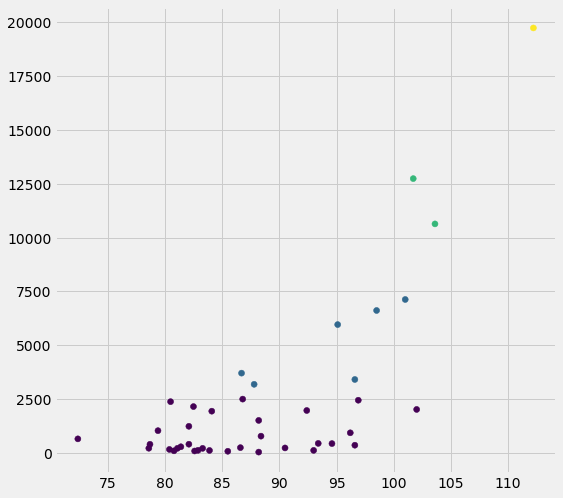

In [73]:
plt.figure(figsize=(8,8))  
plt.scatter(so['renta 100'], so['total'], c=so["cluster"],cmap='viridis')

In [75]:
x=so["cluster"].value_counts().index
x

Int64Index([1, 2, 3, 4], dtype='int64')

### Renta por clusters

<Figure size 1080x1440 with 0 Axes>

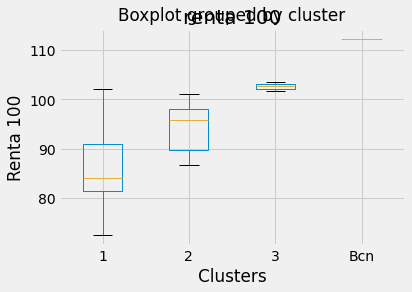

In [76]:
plt.figure(figsize=(15, 20))
plt.tight_layout()
so.boxplot("renta 100", by="cluster")
plt.xlabel("Clusters")
plt.ylabel("Renta 100")


plt.xticks(x,["1","2","3","Bcn"])
plt.show()

<Figure size 1080x1440 with 0 Axes>

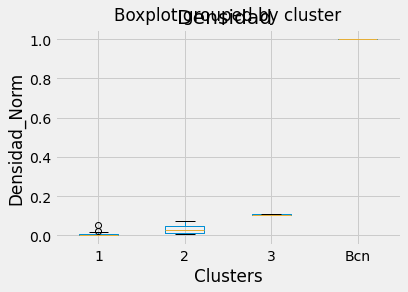

In [77]:
plt.figure(figsize=(15, 20))
plt.tight_layout()
so_norm.boxplot("Densidad ", by="cluster")
plt.xlabel("Clusters")
plt.ylabel("Densidad_Norm")


plt.xticks(x,["1","2","3","Bcn"])
plt.show()

<Figure size 1080x1440 with 0 Axes>

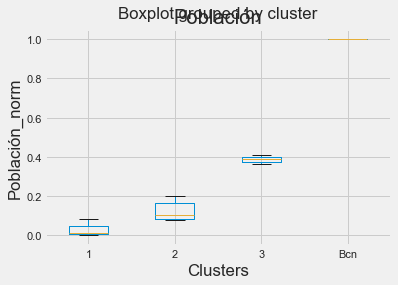

In [150]:
plt.figure(figsize=(15, 20))
plt.tight_layout()
so_norm.boxplot("Población", by="cluster")
plt.xlabel("Clusters")
plt.ylabel("Población_norm")


plt.xticks(x,["1","2","3","Bcn"])
plt.show()
